### **Connecting with Drive**

In [1]:
#Reading the training data Subject
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing All needed libraries**

In [2]:
# #Importing all needed libraries
# import pandas as pd
# import numpy as np #Matric math
# import tensorflow as tf #ML
# from tensorflow.python.framework import ops
# from random import randint
# from numpy import array
# from numpy import argmax
# import keras.backend as K
# from tensorflow.keras import models
# from numpy import array_equal
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import LSTM, Bidirectional
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras import Input
# from tensorflow.keras.layers import TimeDistributed
# from tensorflow.keras.layers import RepeatVector
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import plot_model
# import matplotlib.pyplot as plt
# import sys
# import os
# from scipy.io import loadmat
# from scipy.io import loadmat

# # sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# # from rnn_utils import *
# # from public_tests import *
# ops.reset_default_graph()

# tf.compat.v1.reset_default_graph() #Clearning cache
# sess=tf.compat.v1.InteractiveSession()




### **Reading the Training dataset**

In [3]:
# import pandas as pd
# from scipy.io import loadmat

# def load_files():
#     full_data = pd.DataFrame()
#     subjects_to_load = [1,3,4,5,6,7,8,9,10]

#     for i in subjects_to_load:
#         # Load the .mat file
#         training_data = loadmat(f'/content/drive/My Drive/Colab Notebooks/processed withstim/S{i}_E1.mat')
#         Data = training_data["Data"]
#         Data_df = pd.DataFrame(Data)
#         full_data = pd.concat([full_data, Data_df], ignore_index=True)
#     return full_data



In [4]:
# Data1 = load_files()
# Data1

### **Preparing the training dataset**

In [5]:
# Data1=np.array(Data1)

# # Extract features and targets for training
# X_train = Data1[:, 36:58]   # Target for training
# Z_train = Data1[:, 58:82]  # Input features for training


# del Data1
# #####################################################
# print(X_train.shape)
# print(Z_train.shape)


### **Reading Test datase**

In [6]:
# data_path = '/content/drive/My Drive/Colab Notebooks/processed withstim/S2_E1.mat'


# test_data = loadmat(data_path)
# Data=test_data["Data"]
# Data1=np.array(Data)

# print(Data1.shape)

In [7]:
# X_test = Data1[:, 36:58]  # Target for testing it starts at 36 and ends at 58
# Z_test = Data1[:, 58:82]  # Input features for testing
# del Data1
# print(X_test.shape)
# print(Z_test.shape)

### **Reshaping of training and testing datase**

In [8]:
# sequence_length=15
# n_features=24
# # Prepare input and output for LSTM (training)
# n_sequences_train = len(Z_train) - sequence_length + 1
# in_train = np.zeros((n_sequences_train, sequence_length, n_features))
# out_train = np.zeros((n_sequences_train, X_train.shape[1]))  # Output shape should match target

# for j in range(n_sequences_train):
#   in_train[j] = Z_train[j:j + sequence_length]
#   out_train[j] = X_train[j + sequence_length - 1]  # Target is the last step in the sequence

#     # Prepare input and output for LSTM (testing)
# n_sequences_test = len(Z_test) - sequence_length + 1
# in_test = np.zeros((n_sequences_test, sequence_length, n_features))
# out_test = np.zeros((n_sequences_test, X_test.shape[1]))

# for j in range(n_sequences_test):
#   in_test[j] = Z_test[j:j + sequence_length]
#   out_test[j] = X_test[j + sequence_length - 1]  # Target is the last step in the sequence

# # Print the shape of the prepared data for sanity check
# print(f"LSTM training input shape: {in_train.shape}, LSTM training output shape: {out_train.shape}")
# print(f"LSTM testing input shape: {in_test.shape}, LSTM testing output shape: {out_test.shape}")


### **Seperate Validation Dataset**

In [9]:
# import random

# # Define the range and the exclusions
# numbers = list(range(1, 41))
# exclusions = {28, 2, 3,1}
# # Remove the excluded numbers
# valid_numbers = [num for num in numbers if num not in exclusions]
# # Generate a random number from the valid list
# i = random.choice(valid_numbers)

# print(f"The validation data is from subject :{i}")

# data_path = f'/content/drive/My Drive/Colab Notebooks/processed withstim/S{i}_E1.mat'


# val_data = loadmat(data_path)
# Data=val_data["Data"]
# Data1=np.array(Data)

# print(Data1.shape)
# X_val = Data1[:, 36:58]   # Target for testing
# Z_val = Data1[:, 58:82]  # Input features for testing
# del Data1
# print(X_val.shape)
# print(Z_val.shape)

# #prepare validation datase

# sequence_length=15
# n_features=24
# # Prepare input and output for LSTM (training)
# n_sequences_val = len(Z_val) - sequence_length + 1
# in_val = np.zeros((n_sequences_val, sequence_length, n_features))
# out_val = np.zeros((n_sequences_val, X_val.shape[1]))  # Output shape should match target

# for j in range(n_sequences_val):
#   in_train[j] = Z_val[j:j + sequence_length]
#   out_train[j] = X_val[j + sequence_length - 1]  # Target is the last step in the sequence

# print(f"val input shape: {in_val.shape}, LSTM val output shape: {out_val.shape}")


### **Create the Model**

In [10]:
# from tensorflow.keras import layers, Model, Input
# import numpy as np
# import tensorflow as tf

# # Function to augment EMG signals
# def augment_emg_signals(data):
#     noise = np.random.normal(0, 0.1, data.shape)  # Add Gaussian noise
#     scaling = np.random.uniform(0.8, 1.2, size=(data.shape[0], 1, data.shape[2]))
#     return data * scaling + noise

# # Define SimpleGNNLayer
# class SimpleGNNLayer(tf.keras.layers.Layer):
#     def __init__(self, num_features, **kwargs):
#         super(SimpleGNNLayer, self).__init__(**kwargs)
#         self.num_features = num_features

#     def build(self, input_shape):
#         self.adjacency_matrix = self.add_weight(
#             shape=(input_shape[-1], self.num_features),
#             initializer="random_normal",
#             trainable=True,
#             name="adjacency_matrix"
#         )

#     def call(self, inputs):
#         return tf.einsum('bti,ij->btj', inputs, self.adjacency_matrix)

# # Define Domain-Specific Normalization
# class DomainSpecificNormalization(tf.keras.layers.Layer):
#     def __init__(self, **kwargs):
#         super(DomainSpecificNormalization, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.gamma = self.add_weight(
#             shape=(1, 1, input_shape[-1]),
#             initializer="ones",
#             trainable=True,
#             name="gamma"
#         )
#         self.beta = self.add_weight(
#             shape=(1, 1, input_shape[-1]),
#             initializer="zeros",
#             trainable=True,
#             name="beta"
#         )

#     def call(self, inputs):
#         mean = tf.reduce_mean(inputs, axis=(1, 2), keepdims=True)
#         std = tf.math.reduce_std(inputs, axis=(1, 2), keepdims=True)
#         normalized = (inputs - mean) / (std + tf.keras.backend.epsilon())
#         return self.gamma * normalized + self.beta

# # Define the Model
# numResponses = 22
# numHiddenUnits = 500
# timesteps = 15  # Number of timesteps (sequence length)
# input_features = 24

# inputs = Input(shape=(timesteps, input_features))

# # Domain-Specific Normalization
# x = DomainSpecificNormalization()(inputs)

# # Convolutional Layers
# x = layers.Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)

# x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)

# # GNN Layer
# x = SimpleGNNLayer(num_features=64)(x)

# # Bidirectional LSTM Layers
# x = layers.Bidirectional(layers.LSTM(numHiddenUnits, return_sequences=True))(x)
# x = layers.Dropout(0.2)(x)

# # Multi-Head Attention Layer
# attn_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
# x = layers.Add()([x, attn_output])  # Residual connection
# x = layers.LayerNormalization()(x)

# # Fully Connected Layers
# x = layers.Dense(400, activation='relu')(x)
# x = layers.Dense(200, activation='relu')(x)

# # Global Average Pooling
# x = layers.GlobalAveragePooling1D()(x)

# # Final Output
# outputs = layers.Dense(numResponses, activation='linear')(x)

# # Define the Model
# model = Model(inputs, outputs)
# model.summary()





### **Train the model**

In [11]:
# import numpy as np
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam

# # Check original data shapes
# print(f"in_train shape: {in_train.shape}")
# print(f"out_train shape: {out_train.shape}")

# # Augment Training Data
# augmented_train_data = augment_emg_signals(in_train)
# print(f"augmented_train_data shape: {augmented_train_data.shape}")

# # Ensure labels match augmented data
# assert augmented_train_data.shape[0] == in_train.shape[0], "Augmented data mismatch!"
# augmented_train_labels = out_train.copy()

# # Combine Original and Augmented Data
# combined_train_data = np.concatenate([in_train, augmented_train_data], axis=0)
# combined_train_labels = np.concatenate([out_train, augmented_train_labels], axis=0)

# # Sanity check
# print(f"combined_train_data shape: {combined_train_data.shape}")
# print(f"combined_train_labels shape: {combined_train_labels.shape}")
# assert combined_train_data.shape[0] == combined_train_labels.shape[0], "Mismatch between data and labels!"

# # Compile the model
# optimizer = Adam(learning_rate=0.001)  # Initial learning rate
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # Callbacks for Training
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-6)
# early_stopping = EarlyStopping(monitor='val_loss', patience=30)

# # Train the Model with Combined Data
# history = model.fit(
#     combined_train_data,
#     combined_train_labels,
#     validation_data=(in_val, out_val),
#     batch_size=32,
#     epochs=200,
#     verbose=1,
#     callbacks=[early_stopping, reduce_lr]
# )


### **Test the Model**

In [12]:
# # Split testing data into fine-tuning and evaluation sets
# split_index = int(len(in_test) * 0.1)
# fine_tune_in = in_test[:split_index]  # 10% for fine-tuning
# fine_tune_out = out_test[:split_index]
# test_in_final = in_test[split_index:]  # Remaining 90% for evaluation
# test_out_final = out_test[split_index:]

# # Fine-tune the model on the new subject
# model.fit(
#     fine_tune_in,
#     fine_tune_out,
#     batch_size=32,
#     epochs=20,
#     verbose=1
# )

# # Predict on the remaining test data
# output_predicted = model.predict(test_in_final)

# # Handle sequence length discrepancy if any
# n = len(test_out_final) - len(output_predicted)
# if n == 0:
#     test_out_final_adjusted = test_out_final
# else:
#     test_out_final_adjusted = test_out_final[:-n, :]

# # Print shapes for sanity check
# print(f"Predicted output shape: {output_predicted.shape}")
# print(f"Actual test output shape: {test_out_final_adjusted.shape}")




In [13]:
# import math
# # Calculate Pearson correlation and RMSE for each dimension
# pearson = []
# mse = []
# for k in range(1, 23):
#     cc_value = np.corrcoef(test_out_final_adjusted[:, k - 1], output_predicted[:, k - 1])[0, 1]
#     rmse_value = math.sqrt(mean_squared_error(test_out_final_adjusted[:, k - 1], output_predicted[:, k - 1]))
#     pearson.append(round(cc_value, 2))
#     mse.append(round(rmse_value, 2))
#     print(f"Pearson correlation for DOF {k}: {pearson[-1]}")
#     print(f"RMSE for DOF {k}: {mse[-1]}")

# # Print final results
# print(f"Final Pearson correlation values: {pearson}")
# print(f"Final RMSE values: {mse}")


In [14]:
!pip install geneticalgorithm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=06cb135a1239bdffcc2e653ccb3218a95f5f86b1c3f3f24b07655a62a7cbf74f
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [15]:
# import numpy as np
# import pandas as pd
# from scipy.io import loadmat
# from tensorflow.keras import layers, Model, Input
# from tensorflow.keras.optimizers import Adam
# from geneticalgorithm import geneticalgorithm as ga
# import signal

# # Augmentation function for EMG signals
# def augment_emg_signals(data):
#     noise = np.random.normal(0, 0.1, data.shape)  # Add Gaussian noise
#     scaling = np.random.uniform(0.8, 1.2, size=(data.shape[0], 1, data.shape[2]))
#     return data * scaling + noise

# # Define SimpleGNNLayer
# class SimpleGNNLayer(layers.Layer):
#     def __init__(self, num_features, **kwargs):
#         super(SimpleGNNLayer, self).__init__(**kwargs)
#         self.num_features = num_features

#     def build(self, input_shape):
#         self.adjacency_matrix = self.add_weight(
#             shape=(input_shape[-1], self.num_features),
#             initializer="random_normal",
#             trainable=True,
#             name="adjacency_matrix"
#         )

#     def call(self, inputs):
#         return tf.einsum('bti,ij->btj', inputs, self.adjacency_matrix)

# # Define Domain-Specific Normalization
# class DomainSpecificNormalization(layers.Layer):
#     def __init__(self, **kwargs):
#         super(DomainSpecificNormalization, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.gamma = self.add_weight(
#             shape=(1, 1, input_shape[-1]),
#             initializer="ones",
#             trainable=True,
#             name="gamma"
#         )
#         self.beta = self.add_weight(
#             shape=(1, 1, input_shape[-1]),
#             initializer="zeros",
#             trainable=True,
#             name="beta"
#         )

#     def call(self, inputs):
#         mean = tf.reduce_mean(inputs, axis=(1, 2), keepdims=True)
#         std = tf.math.reduce_std(inputs, axis=(1, 2), keepdims=True)
#         normalized = (inputs - mean) / (std + tf.keras.backend.epsilon())
#         return self.gamma * normalized + self.beta

#     def compute_output_shape(self, input_shape):
#         return input_shape

# # Define the model architecture
# def build_model(input_features=24, timesteps=15, numResponses=22):
#     inputs = Input(shape=(timesteps, input_features))

#     # Domain-Specific Normalization
#     x = DomainSpecificNormalization()(inputs)

#     # Convolutional Layers
#     x = layers.Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#     x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)

#     x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#     x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)

#     # GNN Layer
#     x = SimpleGNNLayer(num_features=64)(x)

#     # Bidirectional LSTM Layers
#     x = layers.Bidirectional(layers.LSTM(500, return_sequences=True))(x)
#     x = layers.Dropout(0.2)(x)

#     # Multi-Head Attention Layer
#     attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
#     x = layers.Add()([x, attn_output])  # Residual connection
#     x = layers.LayerNormalization()(x)

#     # Fully Connected Layers
#     x = layers.Dense(400, activation='relu')(x)
#     x = layers.Dense(200, activation='relu')(x)

#     # Global Average Pooling
#     x = layers.GlobalAveragePooling1D()(x)

#     # Final Output
#     outputs = layers.Dense(numResponses, activation='linear')(x)

#     model = Model(inputs, outputs)
#     return model

# # Load subject data
# def load_subject_data(subjects_to_load, base_path):
#     all_data = []
#     for i in subjects_to_load:
#         data_path = f"{base_path}/S{i}_E1.mat"
#         subject_data = loadmat(data_path)["Data"]
#         all_data.append(subject_data)
#     return all_data

# # Split data into train, validation, and test
# def split_data(data, sequence_length=15, n_features=24):
#     X = data[:, 36:58]
#     Z = data[:, 58:82]

#     # Prepare input-output sequences
#     n_sequences = len(Z) - sequence_length + 1
#     inputs = np.zeros((n_sequences, sequence_length, n_features))
#     outputs = np.zeros((n_sequences, X.shape[1]))

#     for j in range(n_sequences):
#         inputs[j] = Z[j:j + sequence_length]
#         outputs[j] = X[j + sequence_length - 1]
#     return inputs, outputs



# def fitness_function(subject_selection, all_subjects_data, test_subject_data):
#     try:
#         print("Evaluating fitness for subject selection:", subject_selection)
#         selected_indices = [i for i, val in enumerate(subject_selection) if val == 1]
#         if len(selected_indices) < 5:
#             print("Too few subjects selected. Penalizing.")
#             return 1e6  # Penalize invalid selection

#         # Combine selected data
#         selected_data = [all_subjects_data[i] for i in selected_indices]
#         combined_data = np.concatenate(selected_data, axis=0)
#         print("Combined data shape:", combined_data.shape)

#         # Split train and validation
#         in_train, out_train = split_data(combined_data)
#         in_val, out_val = split_data(test_subject_data)

#         # Augment and train
#         augmented_data = augment_emg_signals(in_train)
#         combined_train_data = np.concatenate([in_train, augmented_data], axis=0)
#         combined_train_labels = np.concatenate([out_train, out_train], axis=0)

#         # Train model
#         model = build_model()
#         model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#         model.fit(combined_train_data, combined_train_labels, validation_data=(in_val, out_val), epochs=3, verbose=0)

#         # Evaluate
#         val_loss = model.evaluate(in_val, out_val, verbose=0)
#         print("Validation loss:", val_loss)
#         return val_loss

#     except Exception as e:
#         print("Error in fitness function:", str(e))
#         return 1e6  # Penalize invalid configurations




In [16]:
# from scipy.stats import pearsonr
# import numpy as np

# def train_and_test_model(ga_result, all_subjects_data, test_subject_data):
#     # Extract optimal subject selection
#     optimal_selection = ga_result['variable']
#     print(f"Optimal selection vector: {optimal_selection}")

#     # Combine data from selected training subjects
#     selected_indices = [i for i, selected in enumerate(optimal_selection) if selected == 1]
#     if len(selected_indices) < 5:
#         print("Warning: Fewer than 5 subjects selected, results may not generalize well.")
#     selected_data = [all_subjects_data[i] for i in selected_indices]
#     combined_data = np.concatenate(selected_data, axis=0)
#     print(f"Combined training data shape: {combined_data.shape}")

#     # Split data for training
#     in_train, out_train = split_data(combined_data)

#     # Prepare test data
#     in_test, out_test = split_data(test_subject_data)

#     # Train the model
#     print("Training model...")
#     model = build_model()
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#     model.fit(in_train, out_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

#     # Test the model
#     print("Testing model...")
#     predictions = model.predict(in_test)

#     # Compute correlation coefficient for each degree of freedom
#     correlations = []
#     for i in range(predictions.shape[1]):
#         corr, _ = pearsonr(out_test[:, i], predictions[:, i])
#         correlations.append(corr)

#     avg_correlation = np.mean(correlations)
#     print(f"Average Pearson correlation coefficient: {avg_correlation}")

#     # Return detailed CC results
#     return correlations, avg_correlation

In [17]:
# # import numpy as np
# from geneticalgorithm import geneticalgorithm as ga

# def run_genetic_algorithm(all_subjects_data, test_subject_data):
#     def ga_fitness(subject_selection):
#         return fitness_function(subject_selection, all_subjects_data, test_subject_data)

#     # Define variable bounds (binary selection for each subject)
#     varbound = np.array([[0, 1]] * len(all_subjects_data))

#     # Initialize GA with optimized parameters
#     algorithm = ga(
#         function=ga_fitness,
#         dimension=len(all_subjects_data),
#         variable_type='int',
#         variable_boundaries=varbound,
#         algorithm_parameters={
#             'max_num_iteration': 100,
#             'population_size': 50,
#             'mutation_probability': 0.2,
#             'elit_ratio': 0.05,
#             'parents_portion': 0.3,
#             'crossover_probability': 0.8,
#             'crossover_type': 'uniform',
#         },
#         function_timeout=1e9  # Timeout for fitness function
#     )

#     # Run GA
#     algorithm.run()
#     return algorithm.output_dict

# # Main Program
# if __name__ == "__main__":
#     base_path = '/content/drive/My Drive/Colab Notebooks/processed withstim'
#     all_subjects = list(range(1, 21))  # Reduced to 20 subjects
#     test_subject = 1  # Specify the test subject
#     train_subjects = [s for s in all_subjects if s != test_subject]

#     print(f"Test subject: {test_subject}")
#     print(f"Training subjects: {train_subjects}")

#     # Load data
#     all_subjects_data = load_subject_data(train_subjects, base_path)
#     test_subject_data = load_subject_data([test_subject], base_path)[0]

#     # Run genetic algorithm to find optimal subject subset
#     ga_result = run_genetic_algorithm(all_subjects_data, test_subject_data)
#     print(f"Optimal subject selection: {ga_result['variable']}")

#     # Train and test the model using the optimal solution
#     correlations, avg_correlation = train_and_test_model(ga_result, all_subjects_data, test_subject_data)
#     print(f"Correlations per degree of freedom: {correlations}")
#     print(f"Average Pearson correlation coefficient: {avg_correlation}")


In [18]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [19]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.stats import pearsonr
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from geneticalgorithm import geneticalgorithm as ga
import optuna
import tensorflow as tf

# Augmentation function for EMG signals
def augment_emg_signals(data):
    noise = np.random.normal(0, 0.1, data.shape)  # Add Gaussian noise
    scaling = np.random.uniform(0.8, 1.2, size=(data.shape[0], 1, data.shape[2]))
    return data * scaling + noise

# Define SimpleGNNLayer
class SimpleGNNLayer(layers.Layer):
    def __init__(self, num_features, **kwargs):
        super(SimpleGNNLayer, self).__init__(**kwargs)
        self.num_features = num_features

    def build(self, input_shape):
        self.adjacency_matrix = self.add_weight(
            shape=(input_shape[-1], self.num_features),
            initializer="random_normal",
            trainable=True,
            name="adjacency_matrix"
        )

    def call(self, inputs):
        return tf.einsum('bti,ij->btj', inputs, self.adjacency_matrix)

# Define Domain-Specific Normalization
class DomainSpecificNormalization(layers.Layer):
    def __init__(self, **kwargs):
        super(DomainSpecificNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.gamma = self.add_weight(
            shape=(1, 1, input_shape[-1]),
            initializer="ones",
            trainable=True,
            name="gamma"
        )
        self.beta = self.add_weight(
            shape=(1, 1, input_shape[-1]),
            initializer="zeros",
            trainable=True,
            name="beta"
        )

    def call(self, inputs):
        mean = tf.reduce_mean(inputs, axis=(1, 2), keepdims=True)
        std = tf.math.reduce_std(inputs, axis=(1, 2), keepdims=True)
        normalized = (inputs - mean) / (std + tf.keras.backend.epsilon())
        return self.gamma * normalized + self.beta

# Model architecture
def build_model(input_features=24, timesteps=15, numResponses=22):
    inputs = Input(shape=(timesteps, input_features))
    x = DomainSpecificNormalization()(inputs)
    x = layers.Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)
    x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2, strides=1, padding='same')(x)
    x = SimpleGNNLayer(num_features=64)(x)
    x = layers.Bidirectional(layers.LSTM(500, return_sequences=True))(x)
    x = layers.Dropout(0.2)(x)
    attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attn_output])
    x = layers.LayerNormalization()(x)
    x = layers.Dense(400, activation='relu')(x)
    x = layers.Dense(200, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(numResponses, activation='linear')(x)
    return Model(inputs, outputs)

# Data utilities
def load_subject_data(subjects_to_load, base_path):
    all_data = []
    for i in subjects_to_load:
        data_path = f"{base_path}/S{i}_E1.mat"
        subject_data = loadmat(data_path)["Data"]
        all_data.append(subject_data)
    return all_data

def split_data(data, sequence_length=15, n_features=24):
    X = data[:, 36:58]
    Z = data[:, 58:82]
    n_sequences = len(Z) - sequence_length + 1
    inputs = np.zeros((n_sequences, sequence_length, n_features))
    outputs = np.zeros((n_sequences, X.shape[1]))
    for j in range(n_sequences):
        inputs[j] = Z[j:j + sequence_length]
        outputs[j] = X[j + sequence_length - 1]
    return inputs, outputs

In [20]:
# Fitness Function to Maximize CC
def fitness_function(subject_selection, all_subjects_data, test_subject_data):
    try:
        # Select subjects based on the binary vector
        selected_indices = [i for i, val in enumerate(subject_selection) if val == 1]
        if len(selected_indices) < 3:  # Minimum number of subjects required
            print("Insufficient subjects selected. Penalizing.")
            return -1e6  # Penalize for not selecting enough subjects

        # Combine data from selected subjects
        selected_data = [all_subjects_data[i] for i in selected_indices]
        combined_data = np.concatenate(selected_data, axis=0)
        in_train, out_train = split_data(combined_data)
        in_val, out_val = split_data(test_subject_data)

        print(f"Training data shape: {in_train.shape}, {out_train.shape}")
        print(f"Validation data shape: {in_val.shape}, {out_val.shape}")

        # Data augmentation
        augmented_data = augment_emg_signals(in_train)
        combined_train_data = np.concatenate([in_train, augmented_data], axis=0)
        combined_train_labels = np.concatenate([out_train, out_train], axis=0)

        # Build and train the model
        model = build_model()
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        model.fit(combined_train_data, combined_train_labels, validation_data=(in_val, out_val), epochs=5, verbose=0)

        # Predict on validation data
        predictions = model.predict(in_val)

        # Compute Pearson correlation coefficient for each DOF
        correlations = [
            np.corrcoef(out_val[:, i], predictions[:, i])[0, 1]
            for i in range(predictions.shape[1])
        ]
        avg_correlation = np.mean(correlations)  # Mean CC across all DOFs
        print(f"Validation mean correlation: {avg_correlation}")

        # Return mean CC as the fitness score (maximize this value)
        return avg_correlation
    except Exception as e:
        print(f"Error in fitness function: {e}")
        return -1e6  # Penalize for any failure during evaluation


# Bayesian Optimization to Maximize CC
def bayesian_optimization(all_subjects_data, test_subject_data, num_trials=50):
    def objective(trial):
        # Generate a binary vector for subject selection
        subject_selection = [trial.suggest_int(f"subject_{i}", 0, 1) for i in range(len(all_subjects_data))]
        return fitness_function(subject_selection, all_subjects_data, test_subject_data)

    # Set Optuna study to maximize correlation coefficient
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=num_trials)

    # Extract best subject selection
    best_params = study.best_params
    best_selection = [best_params[f"subject_{i}"] for i in range(len(all_subjects_data))]
    best_score = study.best_value

    print(f"Best subject selection: {best_selection}")
    print(f"Best average CC: {best_score}")
    return best_selection


In [21]:
 def run_genetic_algorithm(initial_subject_selection, all_subjects_data, test_subject_data):
    def ga_fitness(subject_selection):
        return fitness_function(subject_selection, all_subjects_data, test_subject_data)

    # Define variable bounds (binary selection for each subject)
    varbound = np.array([[0, 1]] * len(all_subjects_data))

    # Initialize GA
    algorithm = ga(
        function=ga_fitness,
        dimension=len(all_subjects_data),
        variable_type='int',
        variable_boundaries=varbound,
        algorithm_parameters={
            'max_num_iteration': 50,
            'population_size': 25,
            'mutation_probability': 0.2,
            'elit_ratio': 0.05,
            'parents_portion': 0.3,
            'crossover_probability': 0.8,
            'crossover_type': 'uniform',
            'max_iteration_without_improv': 5,  # Added parameter for early stopping
        },
        function_timeout=1e9  # Timeout for fitness function

    )

    # Manually set the initial population
    initial_population = np.tile(initial_subject_selection, (algorithm.param['population_size'], 1))
    algorithm.pop = initial_population

    # Run GA
    algorithm.run()
    return algorithm.output_dict


In [22]:

def train_and_test_model(ga_result, all_subjects_data, test_subject_data):
    optimal_selection = ga_result['variable']
    selected_indices = [i for i, selected in enumerate(optimal_selection) if selected == 1]
    selected_data = [all_subjects_data[i] for i in selected_indices]
    combined_data = np.concatenate(selected_data, axis=0)
    in_train, out_train = split_data(combined_data)
    in_test, out_test = split_data(test_subject_data)
    model = build_model()
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(in_train, out_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
    predictions = model.predict(in_test)
    correlations = [pearsonr(out_test[:, i], predictions[:, i])[0] for i in range(predictions.shape[1])]
    return correlations, np.mean(correlations)



[I 2024-12-29 07:13:12,403] A new study created in memory with name: no-name-043e0dc5-b4bd-44ea-bbc5-96171a0286b4


(9147, 83)
Training data shape: (91026, 15, 24), (91026, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation mean correlation: 0.367296397767589


[I 2024-12-29 07:18:51,420] Trial 0 finished with value: 0.367296397767589 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 1, 'subject_5': 1, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 1, 'subject_17': 1, 'subject_18': 0}. Best is trial 0 with value: 0.367296397767589.


Training data shape: (118465, 15, 24), (118465, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:25:59,963] Trial 1 finished with value: 0.28344903255027565 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 1, 'subject_5': 0, 'subject_6': 1, 'subject_7': 0, 'subject_8': 1, 'subject_9': 1, 'subject_10': 1, 'subject_11': 1, 'subject_12': 1, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 1, 'subject_17': 0, 'subject_18': 0}. Best is trial 0 with value: 0.367296397767589.


Validation mean correlation: 0.28344903255027565
Training data shape: (82046, 15, 24), (82046, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:31:00,213] Trial 2 finished with value: 0.3369450175799166 and parameters: {'subject_0': 1, 'subject_1': 0, 'subject_2': 0, 'subject_3': 0, 'subject_4': 0, 'subject_5': 1, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 1, 'subject_16': 1, 'subject_17': 1, 'subject_18': 0}. Best is trial 0 with value: 0.367296397767589.


Validation mean correlation: 0.3369450175799166
Training data shape: (63758, 15, 24), (63758, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:34:58,057] Trial 3 finished with value: 0.2507101744472053 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 0, 'subject_17': 0, 'subject_18': 1}. Best is trial 0 with value: 0.367296397767589.


Validation mean correlation: 0.2507101744472053
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:38:54,234] Trial 4 finished with value: 0.40092470783591055 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.40092470783591055
Training data shape: (145794, 15, 24), (145794, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:47:38,498] Trial 5 finished with value: 0.28878319428747357 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 1, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 1, 'subject_13': 1, 'subject_14': 1, 'subject_15': 0, 'subject_16': 1, 'subject_17': 1, 'subject_18': 1}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.28878319428747357
Training data shape: (45560, 15, 24), (45560, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:50:30,831] Trial 6 finished with value: 0.34000994967364473 and parameters: {'subject_0': 0, 'subject_1': 0, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 1, 'subject_6': 0, 'subject_7': 0, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 1, 'subject_16': 0, 'subject_17': 0, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.34000994967364473
Training data shape: (81987, 15, 24), (81987, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 07:55:29,500] Trial 7 finished with value: 0.3346211461497814 and parameters: {'subject_0': 0, 'subject_1': 0, 'subject_2': 0, 'subject_3': 1, 'subject_4': 1, 'subject_5': 1, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 1, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3346211461497814
Training data shape: (82023, 15, 24), (82023, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:00:31,447] Trial 8 finished with value: 0.29912431282457375 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 1, 'subject_5': 0, 'subject_6': 1, 'subject_7': 0, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 1, 'subject_14': 1, 'subject_15': 1, 'subject_16': 0, 'subject_17': 0, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.29912431282457375
Training data shape: (109341, 15, 24), (109341, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:07:09,223] Trial 9 finished with value: 0.2965106289073894 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 1, 'subject_5': 1, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 1, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 1, 'subject_17': 0, 'subject_18': 1}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.2965106289073894
Training data shape: (63799, 15, 24), (63799, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:11:06,134] Trial 10 finished with value: 0.2304398869717649 and parameters: {'subject_0': 0, 'subject_1': 0, 'subject_2': 1, 'subject_3': 0, 'subject_4': 0, 'subject_5': 0, 'subject_6': 0, 'subject_7': 0, 'subject_8': 1, 'subject_9': 0, 'subject_10': 1, 'subject_11': 0, 'subject_12': 1, 'subject_13': 0, 'subject_14': 0, 'subject_15': 1, 'subject_16': 0, 'subject_17': 1, 'subject_18': 1}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.2304398869717649
Training data shape: (81929, 15, 24), (81929, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:16:07,278] Trial 11 finished with value: 0.35131399740738267 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 1, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.35131399740738267
Training data shape: (100179, 15, 24), (100179, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:22:15,080] Trial 12 finished with value: 0.33158713009845736 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 1, 'subject_6': 0, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 1, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.33158713009845736
Training data shape: (54596, 15, 24), (54596, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:25:40,102] Trial 13 finished with value: 0.2673220221969846 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.2673220221969846
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:28:31,853] Trial 14 finished with value: 0.39632096473131173 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.39632096473131173
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:32:27,817] Trial 15 finished with value: 0.391204765059582 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.391204765059582
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:35:22,746] Trial 16 finished with value: 0.3706173988282034 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3706173988282034
Training data shape: (72961, 15, 24), (72961, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:39:54,044] Trial 17 finished with value: 0.22598729017153518 and parameters: {'subject_0': 0, 'subject_1': 0, 'subject_2': 1, 'subject_3': 0, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 0, 'subject_8': 1, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 1, 'subject_13': 0, 'subject_14': 0, 'subject_15': 1, 'subject_16': 0, 'subject_17': 1, 'subject_18': 1}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.22598729017153518
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:42:48,288] Trial 18 finished with value: 0.3543469291491173 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3543469291491173
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:46:44,675] Trial 19 finished with value: 0.3806595995131772 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3806595995131772
Training data shape: (54743, 15, 24), (54743, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:50:12,609] Trial 20 finished with value: 0.279026178433706 and parameters: {'subject_0': 1, 'subject_1': 0, 'subject_2': 0, 'subject_3': 0, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 0, 'subject_8': 0, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 1, 'subject_13': 0, 'subject_14': 0, 'subject_15': 1, 'subject_16': 0, 'subject_17': 0, 'subject_18': 1}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.279026178433706
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:54:09,974] Trial 21 finished with value: 0.33935027023102343 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.33935027023102343
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 08:58:07,191] Trial 22 finished with value: 0.34854983134330614 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.34854983134330614
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:02:03,464] Trial 23 finished with value: 0.3515551731959533 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3515551731959533
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:06:00,739] Trial 24 finished with value: 0.3733944707183614 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3733944707183614
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:09:57,684] Trial 25 finished with value: 0.31839517675017215 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.31839517675017215
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:13:58,851] Trial 26 finished with value: 0.3649202248481646 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3649202248481646
Training data shape: (63759, 15, 24), (63759, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:17:57,849] Trial 27 finished with value: 0.365174321772253 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 1, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 1, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.365174321772253
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:20:52,152] Trial 28 finished with value: 0.39829198952523676 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.39829198952523676
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-12-29 09:23:43,985] Trial 29 finished with value: 0.3972467917816861 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3972467917816861
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:26:37,515] Trial 30 finished with value: 0.3430562374614557 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 4 with value: 0.40092470783591055.


Validation mean correlation: 0.3430562374614557
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:29:29,896] Trial 31 finished with value: 0.405058463374334 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.405058463374334
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:32:24,581] Trial 32 finished with value: 0.39256895280128534 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.39256895280128534
Training data shape: (45513, 15, 24), (45513, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:35:20,394] Trial 33 finished with value: 0.3780486874063472 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.3780486874063472
Training data shape: (63764, 15, 24), (63764, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:39:20,035] Trial 34 finished with value: 0.34892896169921883 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 1, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.34892896169921883
Training data shape: (54650, 15, 24), (54650, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:42:47,580] Trial 35 finished with value: 0.36912482139244174 and parameters: {'subject_0': 0, 'subject_1': 1, 'subject_2': 0, 'subject_3': 1, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 0, 'subject_12': 0, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 1, 'subject_17': 0, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.36912482139244174
Training data shape: (54643, 15, 24), (54643, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:46:12,467] Trial 36 finished with value: 0.3995719035437606 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.3995719035437606
Training data shape: (81987, 15, 24), (81987, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 09:51:11,922] Trial 37 finished with value: 0.30672692955689834 and parameters: {'subject_0': 1, 'subject_1': 0, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 1, 'subject_6': 1, 'subject_7': 0, 'subject_8': 0, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 1, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.30672692955689834
Training data shape: (91159, 15, 24), (91159, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-12-29 09:56:46,856] Trial 38 finished with value: 0.3402311110028146 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 0, 'subject_5': 0, 'subject_6': 1, 'subject_7': 1, 'subject_8': 0, 'subject_9': 1, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 1, 'subject_15': 1, 'subject_16': 1, 'subject_17': 0, 'subject_18': 1}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.3402311110028146
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:00:13,105] Trial 39 finished with value: 0.4012335975207846 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.4012335975207846
Training data shape: (54629, 15, 24), (54629, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:03:48,859] Trial 40 finished with value: 0.32201730720960303 and parameters: {'subject_0': 1, 'subject_1': 0, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 1, 'subject_6': 0, 'subject_7': 0, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 1, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 31 with value: 0.405058463374334.


Validation mean correlation: 0.32201730720960303
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:07:18,735] Trial 41 finished with value: 0.42172404721322215 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.42172404721322215
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:10:45,903] Trial 42 finished with value: 0.4176879247525002 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.4176879247525002
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:14:13,305] Trial 43 finished with value: 0.37090122281615634 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.37090122281615634
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:17:38,940] Trial 44 finished with value: 0.38237834627343276 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.38237834627343276
Training data shape: (63744, 15, 24), (63744, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:21:07,103] Trial 45 finished with value: 0.3703967227556635 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.3703967227556635
Training data shape: (54610, 15, 24), (54610, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:24:33,157] Trial 46 finished with value: 0.38387205531071616 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.38387205531071616
Training data shape: (72813, 15, 24), (72813, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:29:00,297] Trial 47 finished with value: 0.3713403256088563 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 1, 'subject_11': 1, 'subject_12': 0, 'subject_13': 0, 'subject_14': 0, 'subject_15': 0, 'subject_16': 1, 'subject_17': 1, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.3713403256088563
Training data shape: (63780, 15, 24), (63780, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-12-29 10:32:53,683] Trial 48 finished with value: 0.3379177512604919 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 0, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 1, 'subject_13': 0, 'subject_14': 0, 'subject_15': 1, 'subject_16': 0, 'subject_17': 0, 'subject_18': 0}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.3379177512604919
Training data shape: (81949, 15, 24), (81949, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2024-12-29 10:38:00,569] Trial 49 finished with value: 0.3739772855052916 and parameters: {'subject_0': 1, 'subject_1': 1, 'subject_2': 0, 'subject_3': 0, 'subject_4': 1, 'subject_5': 1, 'subject_6': 0, 'subject_7': 1, 'subject_8': 0, 'subject_9': 0, 'subject_10': 0, 'subject_11': 1, 'subject_12': 0, 'subject_13': 1, 'subject_14': 0, 'subject_15': 0, 'subject_16': 0, 'subject_17': 1, 'subject_18': 1}. Best is trial 41 with value: 0.42172404721322215.


Validation mean correlation: 0.3739772855052916
Best subject selection: [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Best average CC: 0.42172404721322215
Training data shape: (72864, 15, 24), (72864, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation mean correlation: 0.23785982807702907
Training data shape: (109391, 15, 24), (109391, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation mean correlation: 0.3225488887560437
Training data shape: (82006, 15, 24), (82006, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation mean correlation: 0.2995227225272313
Training data shape: (72880, 15, 24), (72880, 22)
Validation data shape: (9133, 15, 24), (9133, 22)
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation mean correlation: 0.2071214290379162
Training data shape: (54583, 15, 24), (54583, 22)
Validation data shape: (

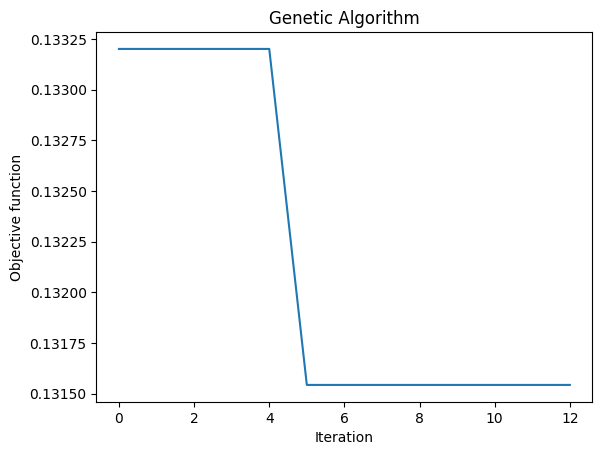


2052/2052 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 0.0298 - val_loss: 0.0398
Epoch 2/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0096 - val_loss: 0.0422
Epoch 3/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0077 - val_loss: 0.0402
Epoch 4/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0065 - val_loss: 0.0375
Epoch 5/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0057 - val_loss: 0.0407
Epoch 6/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0051 - val_loss: 0.0387
Epoch 7/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0043 - val_loss: 0.0365
Epoch 8/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0039 - val_loss: 0.0366
Epoch 9/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0037 - val_loss: 0.0387
Epoch 10/10
2052/2052 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0034 - val_loss: 0.0404
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Correlations per degree of freedom: [0.09245693603169478, 0.08353251

In [ ]:
if __name__ == "__main__":
    base_path = '/content/drive/My Drive/Colab Notebooks/processed withstim'
    all_subjects = list(range(1, 21))
    test_subject = 1
    train_subjects = [s for s in all_subjects if s != test_subject]
    all_subjects_data = load_subject_data(train_subjects, base_path)
    test_subject_data = load_subject_data([test_subject], base_path)[0]
    print(test_subject_data.shape)
    bo_result = bayesian_optimization(all_subjects_data, test_subject_data)
    ga_result = run_genetic_algorithm(bo_result, all_subjects_data, test_subject_data)
    correlations, avg_correlation = train_and_test_model(ga_result, all_subjects_data, test_subject_data)
    print(f"Correlations per degree of freedom: {correlations}")
    print(f"Average Pearson correlation coefficient: {avg_correlation}")